In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Features:

1. Age : Age of the patient
2. Sex : Sex of the patient
3. exang: exercise induced angina (1 = yes; 0 = no)
4. ca: number of major vessels (0-3)
5. cp : Chest Pain type chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
6. trtbps : resting blood pressure (in mm Hg)
7. chol : cholestoral in mg/dl fetched via BMI sensor
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
9. rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
10. thalach : maximum heart rate achieved
11. restecg : resting electrocardiographic results
12. target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.shape

(1025, 14)

In [4]:
pd.DataFrame(data.isna().sum().sort_values(ascending=False), columns = ["NaN counts"])

,NaN counts
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


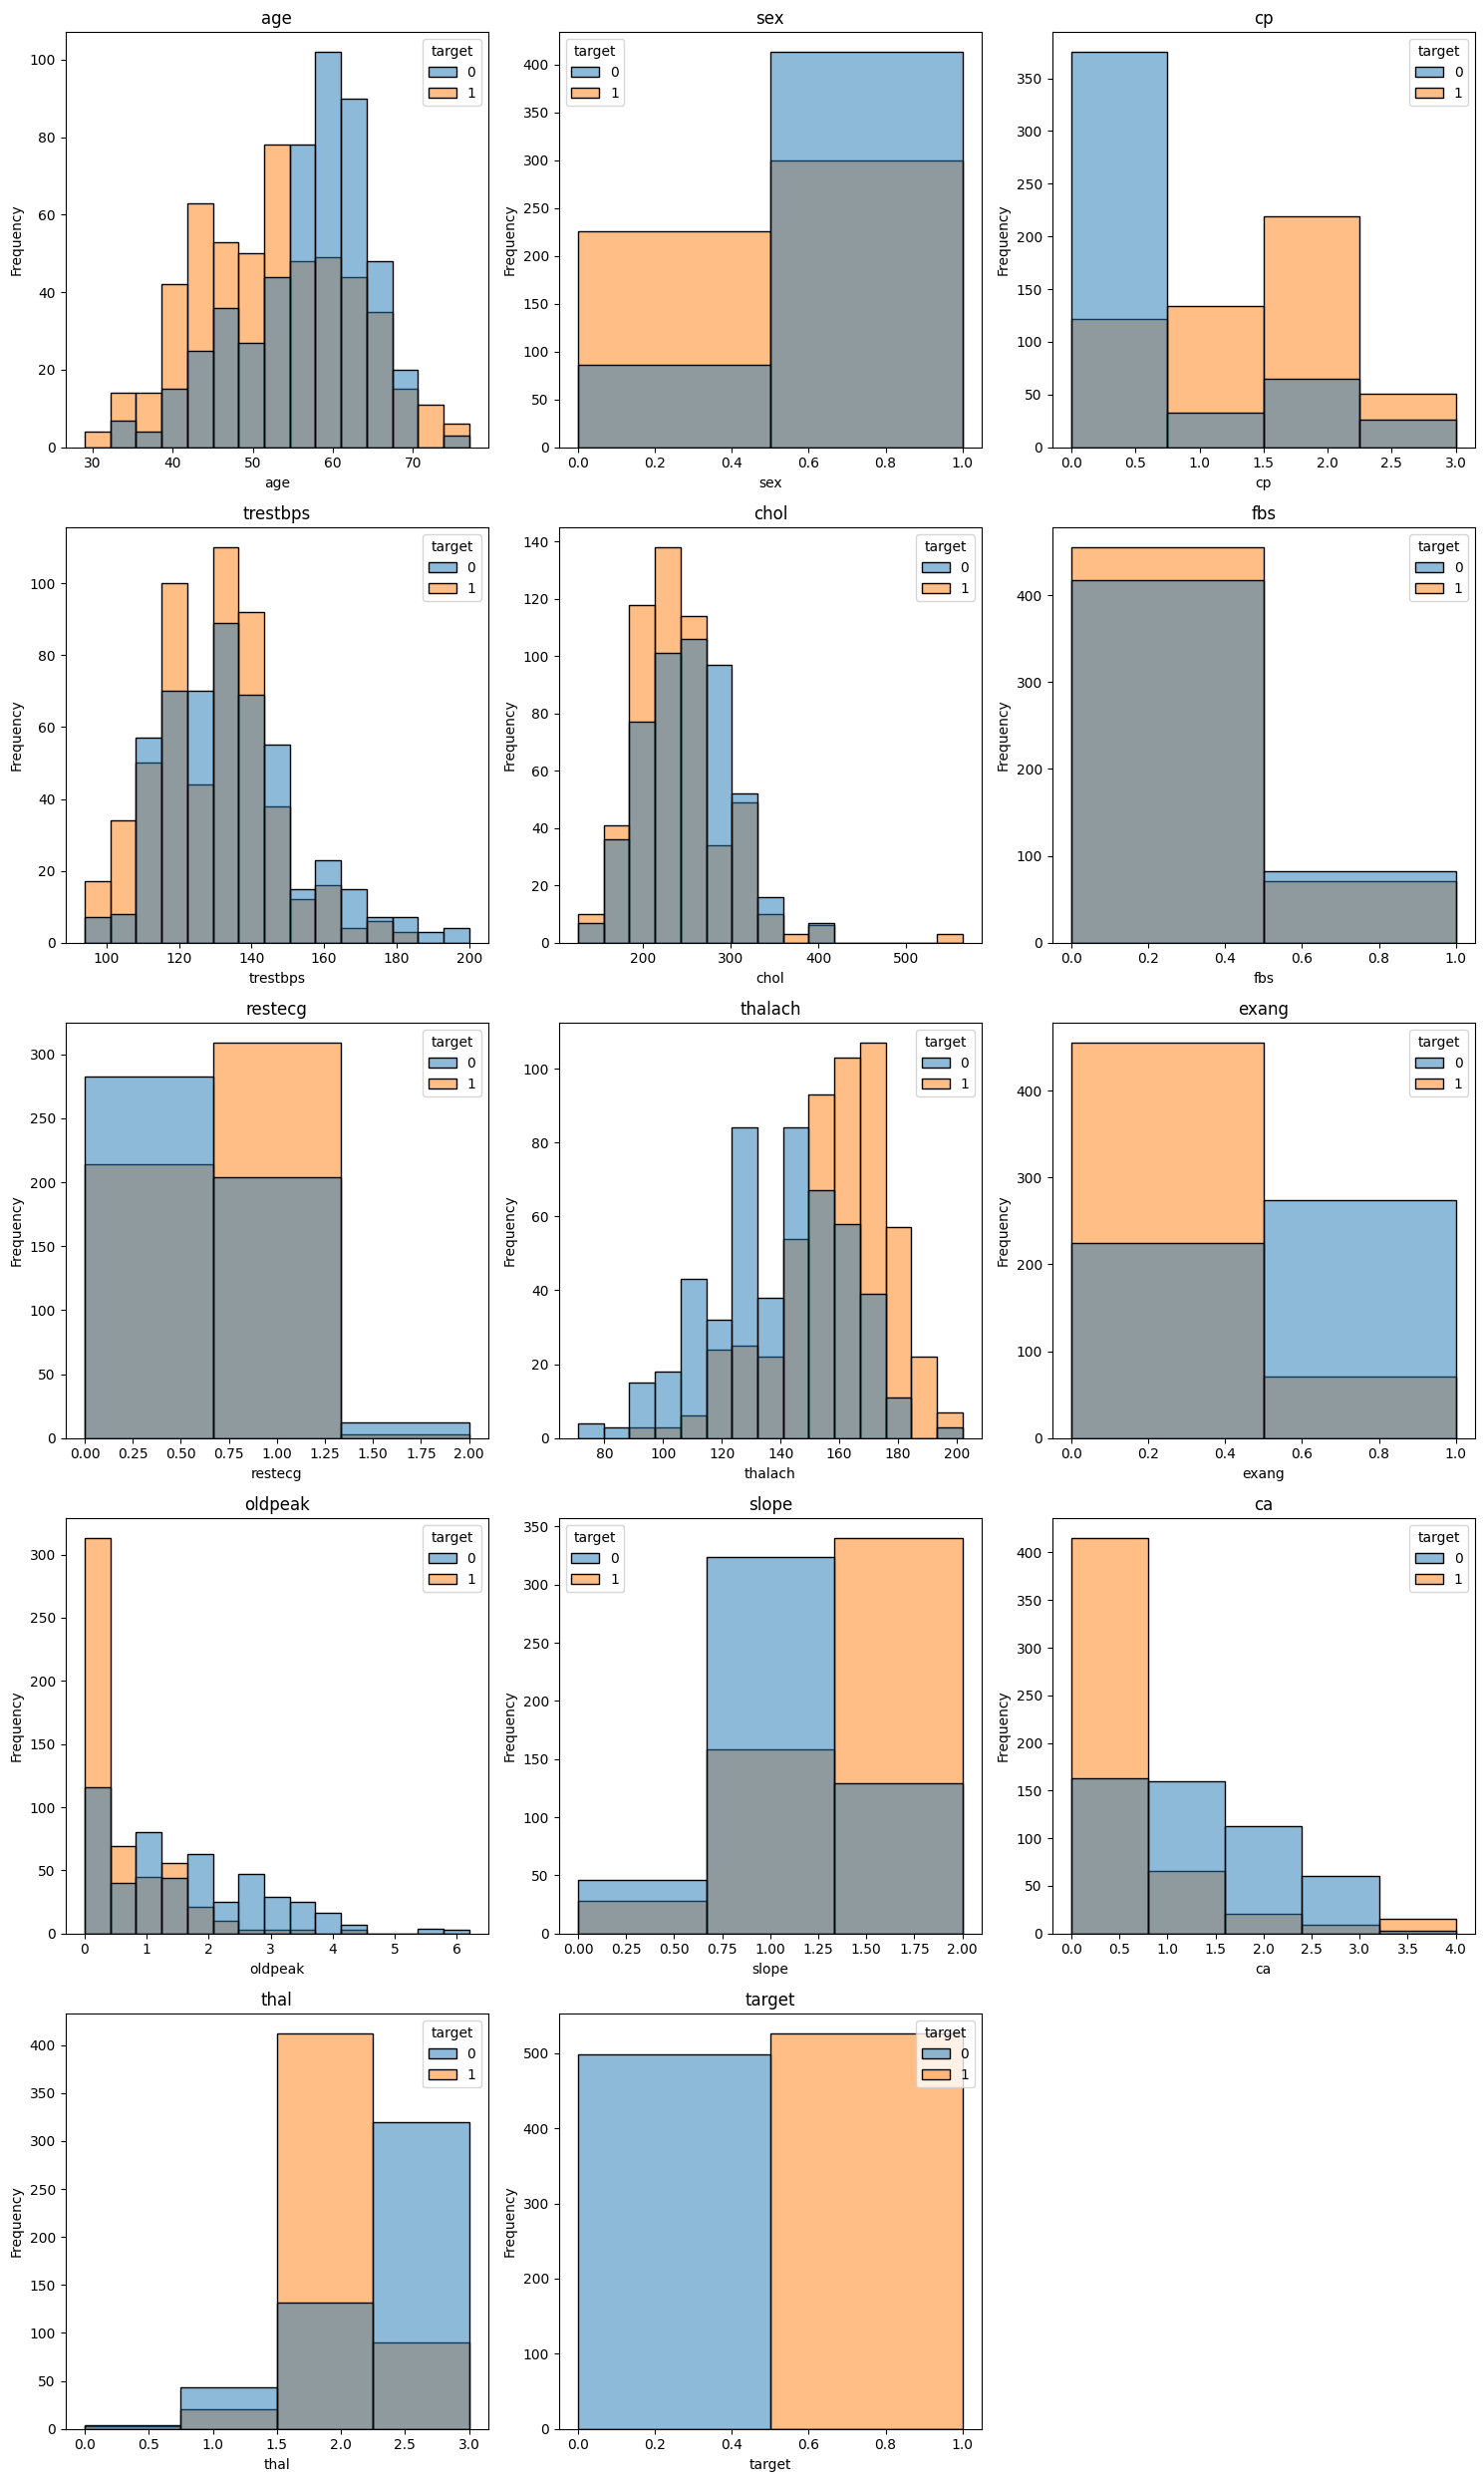

In [5]:
numerical_vars = data.select_dtypes(include='number').columns.tolist()
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create histograms
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    bins = min([len(data[variable].value_counts()),15])
    sns.histplot(data = data, x = variable, ax=ax, bins = bins, hue = "target", hue_order = [0,1])
    ax.set_title(variable)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

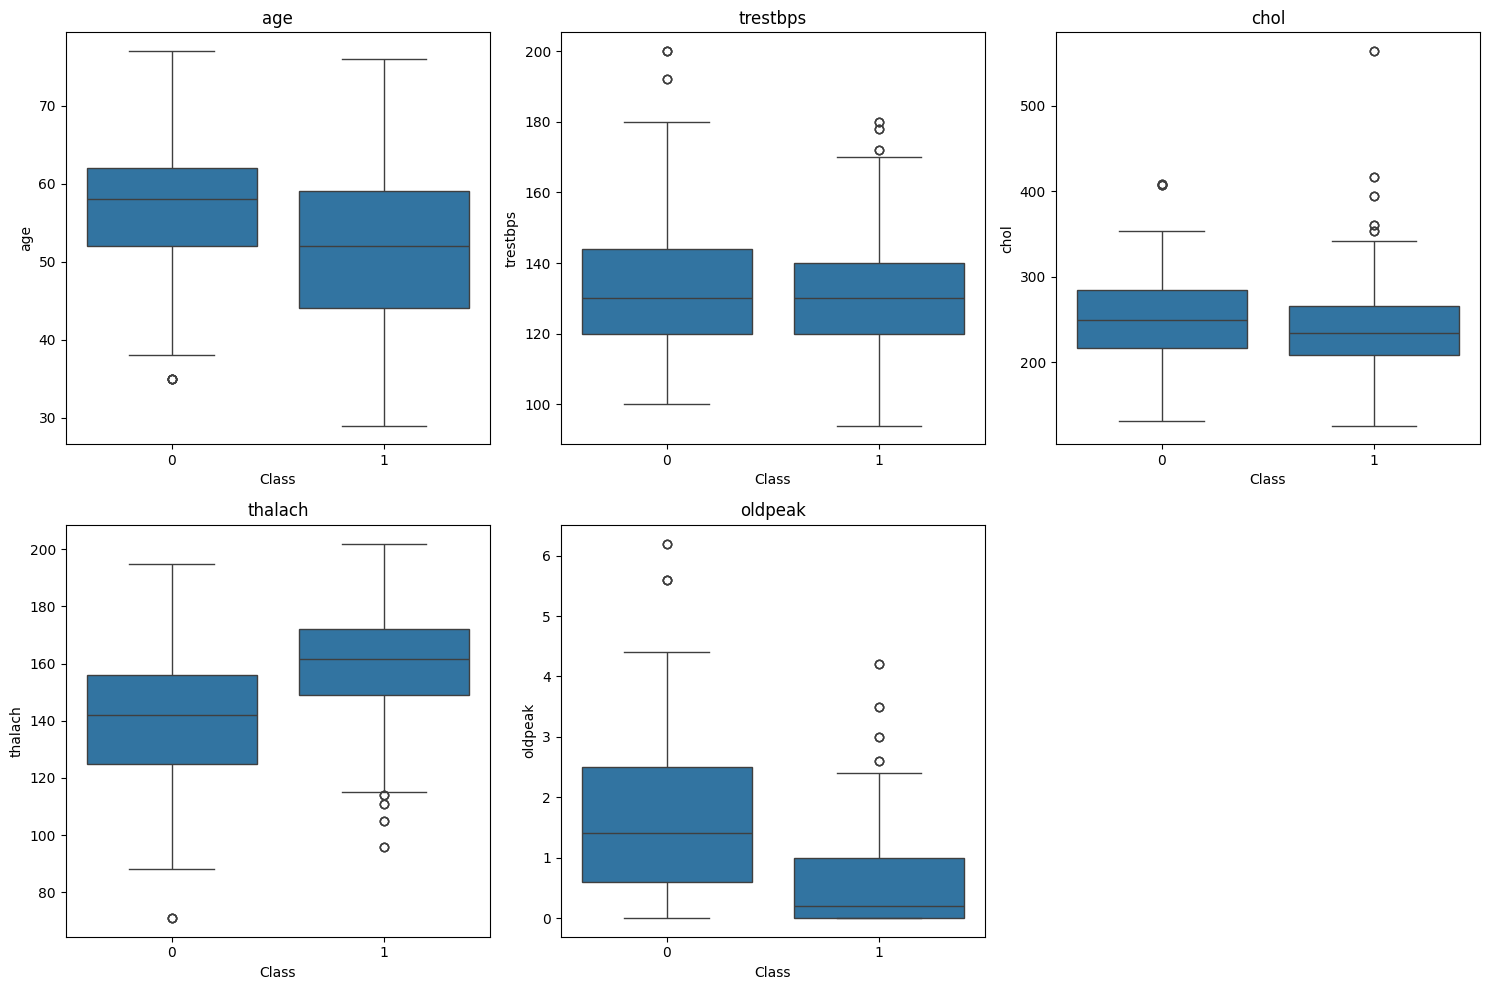

In [6]:
numerical_vars = [col for col in data.select_dtypes(include='number').columns if data[col].nunique() > 5]
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create boxplots
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.boxplot(data=data, x='target', y=variable, ax=ax)  # Change to boxplot
    ax.set_title(variable)
    ax.set_xlabel('Class')
    ax.set_ylabel(variable)

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [7]:
data.agg(['min', 'max'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
min,29,0,0,94,126,0,0,71,0,0.0,0,0,0,0
max,77,1,3,200,564,1,2,202,1,6.2,2,4,3,1


In [8]:
data = data.drop_duplicates()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
data.shape # same as heart_attack_analysis_prediction_dataset

(302, 14)

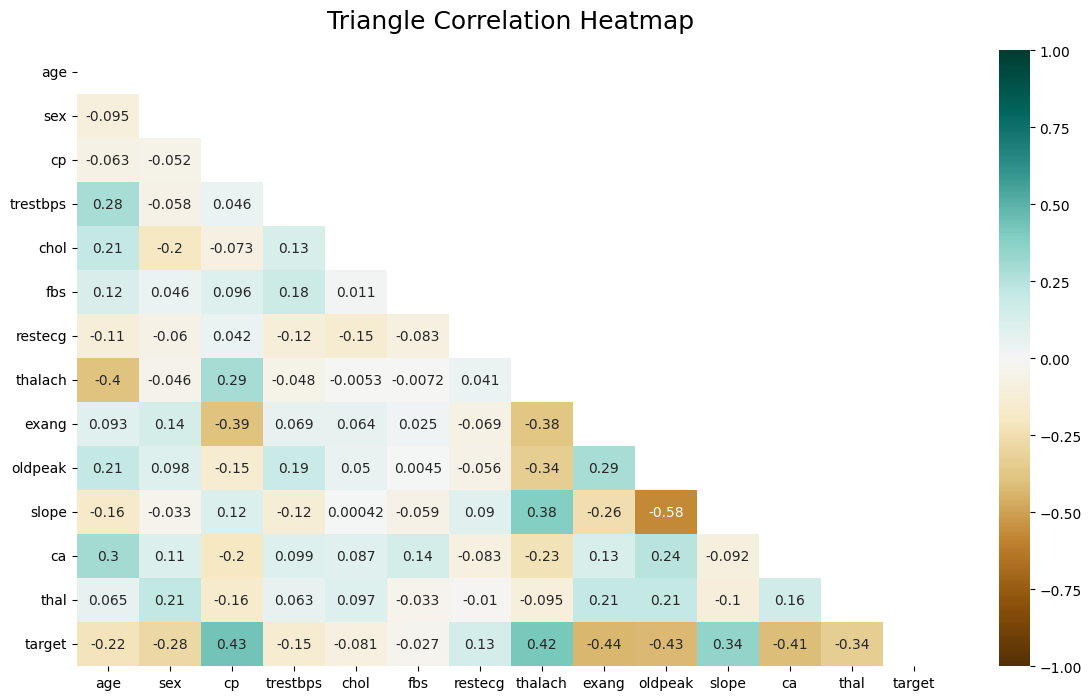

In [10]:
plt.figure(figsize=(14, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()